# Vamos a utilizar un dataset de perros y gatos para explorar técnicas de Data Augmentation

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

### DATASET:

![image.png](attachment:image.png)

El Dataset contiene 4000 imágenes de gatos y perros (2000 gatos y 2000 perros). Vamos a usar 2000 imágenes para entrenar, 1000 para validación, 1000 para test.

![image.png](attachment:image.png)

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs.zip

--2020-11-02 22:05:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs.zip’

/tmp/cats_and_dogs. 100%[===================>]  65.43M   159MB/s    in 0.4s    

2020-11-02 22:05:30 (159 MB/s) - ‘/tmp/cats_and_dogs.zip’ saved [68606236/68606236]



In [5]:
!mkdir -pv /data/cats_and_dogs
!unzip /tmp/cats_and_dogs.zip -d /data/cats_and_dogs

Archive:  /tmp/cats_and_dogs.zip
replace /data/cats_and_dogs/cats_and_dogs_filtered/vectorize.py? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/vectorize.py  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: /data/cats_and_dogs/cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflat

In [6]:
train_dir = "/data/cats_and_dogs/cats_and_dogs_filtered/train/"
validation_dir = "/data/cats_and_dogs/cats_and_dogs_filtered/validation/"

### Preprocesamiento de los datos

* Leer las imágenes
* Decodificar los JPEG en imágenes de píxeles RGB
* Convertir estas imágenes en tensores de valores en punto flotante
* Reescalar los valores de los píxeles al intervalo [0,1]


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Link : https://keras.io/preprocessing/image/

In [8]:
# Así generamos batches desde los directorios de imágenes
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [11]:
model = models.Sequential()

#### COMPLETAR #####
# agregar las siguientes capas:
# convolucional f=(3,3), # de filtros: 32, activación relu
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# convolucional f=(3,3), # de filtros: 64, activación relu
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# capa flatten
model.add(keras.layers.Flatten())
# capa densa de 512 elementos activación relu
model.add(keras.layers.Dense(512, activation="relu"))
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [13]:
from tensorflow.keras import optimizers

# compilar el modelo con binary_crossentropy y optimizador RMSprop con
# learning rate 1e-4, la métrica a usar es la accuracy (acc)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
# utilizar model.fit_generator para entrenar
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
100/100 [==============================] - 9s 90ms/step - loss: 0.6881 - acc: 0.5450 - val_loss: 0.6668 - val_acc: 0.6160
Epoch 2/5
100/100 [==============================] - 9s 90ms/step - loss: 0.6538 - acc: 0.6035 - val_loss: 0.6275 - val_acc: 0.6600
Epoch 3/5
100/100 [==============================] - 9s 88ms/step - loss: 0.6162 - acc: 0.6710 - val_loss: 0.6011 - val_acc: 0.6850
Epoch 4/5
100/100 [==============================] - 9s 89ms/step - loss: 0.5731 - acc: 0.7030 - val_loss: 0.5727 - val_acc: 0.7090
Epoch 5/5
100/100 [==============================] - 9s 88ms/step - loss: 0.5344 - acc: 0.7310 - val_loss: 0.5581 - val_acc: 0.7010


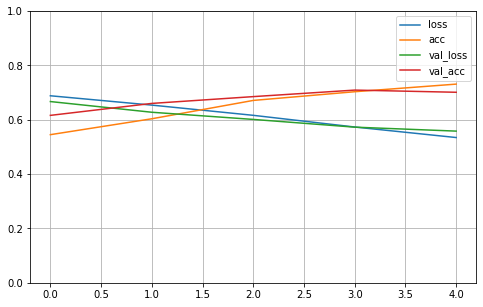

In [15]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [27]:
ev = model.evaluate(validation_generator)
print("Loss:",ev[0], " Accuracy: ", ev[1])

50/50 [==============================] - 3s 57ms/step - loss: 0.5581 - acc: 0.7010
Loss: 0.5580774545669556  Accuracy:  0.7009999752044678


In [28]:
from tensorflow.keras import backend as K 

K.clear_session()
del model

### DATA AUGMENTATION

Distorsión, Rotación, Crop, Flip horizontal: 
![image.png](attachment:image.png)

Vamos a distorsionar (estirando y escalando), rotar las imágenes, invertirlas horizontalmente, hacer zoom en una región, esto va a ser aleatorio dentro de un cierto rango, utilizar ImageDataGenerator con parámetros para que esto ocurra.

https://keras.io/api/preprocessing/image/

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/image_data_generator.py

https://github.com/keras-team/keras-preprocessing/blob/master/keras_preprocessing/image/affine_transformations.py

usar:

- rotation_range -> rango aleatorio de angulo de rotacions
- width_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- height_shift_range -> rango aleatorio de desplazamiento en x expresado como proporcion de la imagen [0,1]
- shear_range -> rango aleatorio de 'shear' o cillamiento https://en.wikipedia.org/wiki/Shear_mapping [0,1]
- zoom_range -> rango aleatorio de zoom de la imagen [0,1]
- horizontal_flip -> boolean (si se flipea aleatoriamente la imagen en la dirección horizontal)

In [47]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Veamos algunas imágenes

In [48]:
model = models.Sequential()

#### COMPLETAR #####
### usar el mismo modelo de antes
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(150, 150, 3)))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# convolucional f=(3,3), # de filtros: 64, activación relu
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# convolucional f=(3,3), # de filtros: 128, activación relu
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides=1, padding='valid', activation='relu'))
# max pooling f=2, s=2
model.add(keras.layers.MaxPooling2D((2, 2),strides=2))
# capa flatten
model.add(keras.layers.Flatten())
# capa densa de 512 elementos activación relu
model.add(keras.layers.Dense(512, activation="relu"))
# capa densa con un output de 1 elemento con activación sigmoidea
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [49]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size)

Epoch 1/5
63/62 [==============================] - 17s 268ms/step - loss: 0.6973 - acc: 0.5385 - val_loss: 0.6844 - val_acc: 0.5010
Epoch 2/5
63/62 [==============================] - 16s 261ms/step - loss: 0.6849 - acc: 0.5520 - val_loss: 0.6647 - val_acc: 0.5990
Epoch 3/5
63/62 [==============================] - 16s 261ms/step - loss: 0.6722 - acc: 0.5760 - val_loss: 0.6430 - val_acc: 0.6360
Epoch 4/5
63/62 [==============================] - 16s 261ms/step - loss: 0.6516 - acc: 0.6130 - val_loss: 0.6232 - val_acc: 0.6530
Epoch 5/5
63/62 [==============================] - 17s 262ms/step - loss: 0.6457 - acc: 0.6250 - val_loss: 0.6064 - val_acc: 0.6820


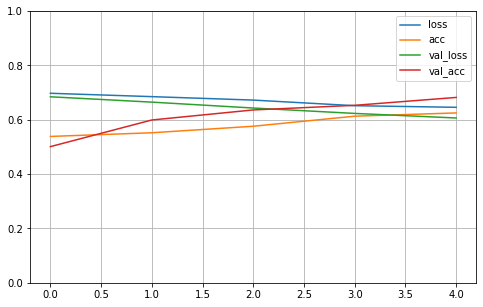

In [50]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
ev = model.evaluate(validation_generator)
print("Loss:",ev[0], " Accuracy: ", ev[1])

32/32 [==============================] - 3s 85ms/step - loss: 0.6064 - acc: 0.6820
Loss: 0.6063793897628784  Accuracy:  0.6819999814033508


In [46]:
keras.backend.clear_session
del model

# Conclusiones

- Pendiente probar con dataset mayor (se usó de 2000 muestras)
- ¿Se puede mejorar eligiendo mejor Hiperparámetros?